# Creating the tidal forcing

In [1]:
from roms_tools import Grid

We first create our grid object. Note that it is important to use the same grid throughout all the steps (i.e., creating tidal forcing, atmospheric forcing, initial conditions, etc.) to set up a consistent ROMS simulation. Here we use the following grid.

In [2]:
grid = Grid(
    nx=100, ny=100, size_x=1800, size_y=2400, center_lon=-10, center_lat=61, rot=-20
)

Given our grid, our goal is now to create the necessary tidal forcing fields to run a ROMS simulation.

The tidal forcing is based on the TPXO atlas, which sits on perlmutter at the following location.

In [3]:
path = "/global/cfs/projectdirs/m4746/Datasets/TPXO/tpxo9.v2a.nc"

You can also download your own version from https://www.tpxo.net/global. Note that ROMS-Tools currently only supports the TPXO9v2 version.

We now create our tidal forcing for a model reference date of January 1st, 2000.

In [4]:
from roms_tools import TidalForcing

In [5]:
from datetime import datetime

In [6]:
model_reference_date = datetime(2000, 1, 1)

In [7]:
%%time

tidal_forcing = TidalForcing(
    grid=grid,
    source={"name": "TPXO", "path": path},
    ntides=10,  # number of constituents to consider <= 14. Default is 10.
    allan_factor=2.0,  # Allan factor. Default is 2.0.
    model_reference_date=model_reference_date,  # Model reference date. Default is January 1, 2000.
    use_dask=True,
)

CPU times: user 1min 56s, sys: 518 ms, total: 1min 56s
Wall time: 6.51 s


To see the values of the tidal forcing variables we can examine the `xarray.Dataset` object returned by the `.ds` property.

In [8]:
tidal_forcing.ds

<xarray.Dataset> Size: 3MB
Dimensions:  (ntides: 10, eta_rho: 102, xi_rho: 102, xi_u: 101, eta_v: 101)
Coordinates:
    omega    (ntides) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
Dimensions without coordinates: ntides, eta_rho, xi_rho, xi_u, eta_v
Data variables:
    ssh_Re   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
    ssh_Im   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
    u_Re     (ntides, eta_rho, xi_u) float32 412kB dask.array<chunksize=(4, 102, 101), meta=np.ndarray>
    u_Im     (ntides, eta_rho, xi_u) float32 412kB dask.array<chunksize=(4, 102, 101), meta=np.ndarray>
    v_Re     (ntides, eta_v, xi_rho) float32 412kB dask.array<chunksize=(4, 101, 102), meta=np.ndarray>
    v_Im     (ntides, eta_v, xi_rho) float32 412kB dask.array<chunksize=(4, 101, 102), meta=np.ndarray>
    pot_Re   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
    pot_Im   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
Attributes:
    title:                 ROMS tidal forcing created by ROMS-Tools
    roms_tools_version:    0.1.dev138+dirty
    source:                TPXO
    model_reference_date:  2000-01-01 00:00:00
    allan_factor:          2.0

We can also plot any of the tidal forcing fields via the `.plot` method.

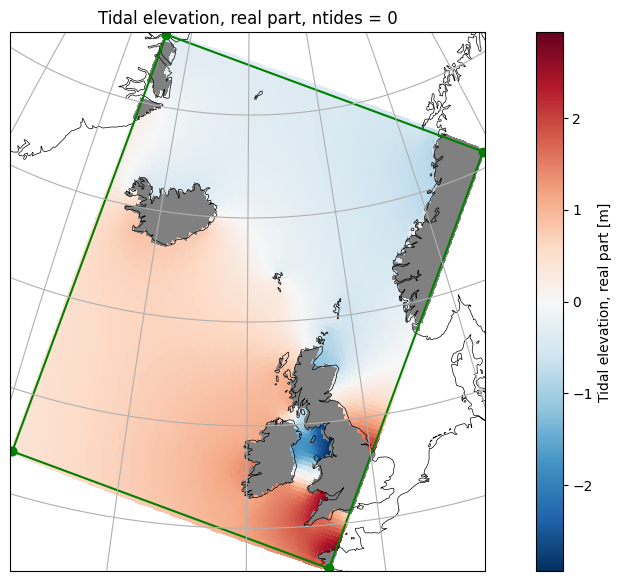

In [9]:
tidal_forcing.plot("ssh_Re", ntides=0)

## Saving as NetCDF or YAML file

Finally, we can save our tidal forcing as a netCDF file via the `.save` method.

In [10]:
filepath = "/pscratch/sd/n/nloose/forcing/my_tidal_forcing.nc"

In [11]:
%time tidal_forcing.save(filepath)

CPU times: user 4min 1s, sys: 870 ms, total: 4min 2s
Wall time: 2.71 s


[PosixPath('/pscratch/sd/n/nloose/forcing/my_tidal_forcing.nc')]

We can also export the parameters of our `TidalForcing` object to a YAML file.

In [12]:
yaml_filepath = "/pscratch/sd/n/nloose/forcing/my_tidal_forcing.yaml"

In [13]:
tidal_forcing.to_yaml(yaml_filepath)

In [14]:
# Open and read the YAML file
with open(yaml_filepath, "r") as file:
    file_contents = file.read()

# Print the contents
print(file_contents)

---
roms_tools_version: 0.1.dev138+dirty
---
Grid:
  N: 100
  center_lat: 61
  center_lon: -10
  hc: 300.0
  hmin: 5.0
  nx: 100
  ny: 100
  rot: -20
  size_x: 1800
  size_y: 2400
  theta_b: 2.0
  theta_s: 5.0
  topography_source: ETOPO5
TidalForcing:
  allan_factor: 2.0
  model_reference_date: '2000-01-01T00:00:00'
  ntides: 10
  source:
    name: TPXO
    path: /global/cfs/projectdirs/m4746/Datasets/TPXO/tpxo9.v2a.nc



## Creating tidal forcing from an existing YAML file

In [15]:
%time the_same_tidal_forcing = TidalForcing.from_yaml(yaml_filepath, use_dask=True)

CPU times: user 1min 56s, sys: 473 ms, total: 1min 57s
Wall time: 4.55 s


In [16]:
the_same_tidal_forcing.ds

<xarray.Dataset> Size: 3MB
Dimensions:  (ntides: 10, eta_rho: 102, xi_rho: 102, xi_u: 101, eta_v: 101)
Coordinates:
    omega    (ntides) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
Dimensions without coordinates: ntides, eta_rho, xi_rho, xi_u, eta_v
Data variables:
    ssh_Re   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
    ssh_Im   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
    u_Re     (ntides, eta_rho, xi_u) float32 412kB dask.array<chunksize=(4, 102, 101), meta=np.ndarray>
    u_Im     (ntides, eta_rho, xi_u) float32 412kB dask.array<chunksize=(4, 102, 101), meta=np.ndarray>
    v_Re     (ntides, eta_v, xi_rho) float32 412kB dask.array<chunksize=(4, 101, 102), meta=np.ndarray>
    v_Im     (ntides, eta_v, xi_rho) float32 412kB dask.array<chunksize=(4, 101, 102), meta=np.ndarray>
    pot_Re   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
    pot_Im   (ntides, eta_rho, xi_rho) float32 416kB dask.array<chunksize=(4, 102, 102), meta=np.ndarray>
Attributes:
    title:                 ROMS tidal forcing created by ROMS-Tools
    roms_tools_version:    0.1.dev138+dirty
    source:                TPXO
    model_reference_date:  2000-01-01 00:00:00
    allan_factor:          2.0